In [1]:
import torch

In [2]:
x_train = torch.FloatTensor([[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1], [2.7], [2.8], [2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

print("x : " ,x_train.size())
print("y : " ,y_train.size())

x :  torch.Size([12, 1])
y :  torch.Size([12, 1])


In [5]:
W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0


tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [ ]:
for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(-y_train * torch.log(hypothesis)
          -(1-y_train) * torch.log(1-hypothesis)
          )
  cost.backward()
  with torch.no_grad() as grd:
    W = W -lr*W.grad
    b = b- lr*b.grad

    if epoch % 100 == 0:
      #print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}' .format(epoch, cost.item(), W.squeeze(), b))
      print(f"epoch:{epoch}, cost:{cost.item():.6f}, W:{W.squeeze()}, b:{b}")

epoch:0, cost:0.693147, W:-0.15416669845581055, b:tensor([[0.0833]])
epoch:100, cost:0.420221, W:-1.4512814283370972, b:tensor([[4.4069]])
epoch:200, cost:0.398721, W:-1.8984334468841553, b:tensor([[5.7738]])
epoch:300, cost:0.390820, W:-2.1743228435516357, b:tensor([[6.6096]])
epoch:400, cost:0.387009, W:-2.3673288822174072, b:tensor([[7.1916]])
epoch:500, cost:0.384924, W:-2.5106256008148193, b:tensor([[7.6225]])
epoch:600, cost:0.383699, W:-2.620779037475586, b:tensor([[7.9532]])
epoch:700, cost:0.382944, W:-2.707397222518921, b:tensor([[8.2128]])
epoch:800, cost:0.382463, W:-2.7765965461730957, b:tensor([[8.4200]])
epoch:900, cost:0.382149, W:-2.8325209617614746, b:tensor([[8.5874]])
epoch:1000, cost:0.381941, W:-2.878112316131592, b:tensor([[8.7237]])
epoch:1100, cost:0.381801, W:-2.91552996635437, b:tensor([[8.8355]])
epoch:1200, cost:0.381706, W:-2.9464011192321777, b:tensor([[8.9278]])
epoch:1300, cost:0.381641, W:-2.9719796180725098, b:tensor([[9.0042]])
epoch:1400, cost:0.381

In [ ]:
x_test = torch.FloatTensor([[4.5], [1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]])


In [ ]:
optimizer = torch.optim.SGD([W,b], lr=1.0)
#optimizer = torch.optim.Adam([W,b], lr=1.0)
#optimizer = torch.optim.Adadelta([W,b])
#optimizer = torch.optim.Adagrad(([W,b], lr=1.0)
#optimizer = torch.optim.RMSprop(([W,b], lr=1.0)

In [ ]:
for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(-y_train * torch.log(hypothesis)
          -(1-y_train) * torch.log(1-hypothesis)
          )
  optimizer.zero_grad() # 초기화해줘야됨.
  cost.backward()
  optimizer.step() # 있는 객체를 재활용한다.

  if epoch % 100 == 0:
    #print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}' .format(epoch, cost.item(), W.squeeze(), b))
    print(f"epoch:{epoch}, cost:{cost.item():.6f}, W:{W.squeeze()}, b:{b.squeeze()}")

epoch:0, cost:0.693147, W:-0.15416669845581055, b:0.0833333283662796
epoch:100, cost:0.420221, W:-1.4512814283370972, b:4.406926155090332
epoch:200, cost:0.398721, W:-1.8984334468841553, b:5.773751258850098
epoch:300, cost:0.390820, W:-2.1743228435516357, b:6.609555244445801
epoch:400, cost:0.387009, W:-2.3673288822174072, b:7.191600799560547
epoch:500, cost:0.384924, W:-2.5106256008148193, b:7.622529983520508
epoch:600, cost:0.383699, W:-2.620779037475586, b:7.953164100646973
epoch:700, cost:0.382944, W:-2.707397222518921, b:8.212803840637207
epoch:800, cost:0.382463, W:-2.7765965461730957, b:8.420022964477539
epoch:900, cost:0.382149, W:-2.8325209617614746, b:8.587361335754395
epoch:1000, cost:0.381941, W:-2.878112316131592, b:8.723698616027832
epoch:1100, cost:0.381801, W:-2.91552996635437, b:8.835540771484375
epoch:1200, cost:0.381706, W:-2.9464011192321777, b:8.927779197692871
epoch:1300, cost:0.381641, W:-2.9719796180725098, b:9.004180908203125
epoch:1400, cost:0.381596, W:-2.993

In [ ]:
x_test = torch.FloatTensor([[4.5], [1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]], grad_fn=<RoundBackward>)


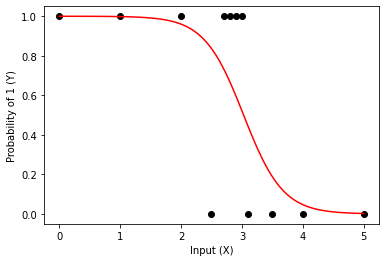

In [ ]:
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train, c="black", label="Training data")

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W) + b)

plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")

plt.plot(X, Y, c="#ff0000", label="Fitting line")
plt.show()